<a href="https://colab.research.google.com/github/ViacheslavBaranov/DijikstraNotebook/blob/main/Dijikstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Визуализированный алгоритм Дейкстры для матрицы смежности
#Вариант 68

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Заполняем матрицу смежности согласно значениям из варианта
n = 12 #  Кол-во вершин
A = np.matrix([
    [0, 3, 0, 2, 0, 1, 5, 4, 4, 0, 0, 1],
    [3, 0, 3, 2, 0, 3, 0, 4, 0, 5, 4, 4],
    [0, 3, 0, 0, 0, 0, 2, 0, 4, 1, 4, 5],
    [2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0],
    [1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [5, 0, 2, 1, 0, 0, 0, 4, 4, 0, 0, 5],
    [4, 4, 0, 0, 4, 0, 4, 0, 1, 2, 5, 4],
    [4, 0, 4, 0, 1, 0, 4, 1, 0, 0, 5, 0],
    [0, 5, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0],
    [0, 4, 4, 2, 0, 0, 0, 5, 5, 0, 0, 5],
    [1, 4, 5, 0, 0, 1, 5, 4, 0, 0, 5, 0],
])
G = nx.from_numpy_matrix(A)
G.add_nodes_from([x for x in range(n, 2 * n)]) # Для графика
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 1}), (0, 6, {'weight': 5}), (0, 7, {'weight': 4}), (0, 8, {'weight': 4}), (0, 11, {'weight': 1}), (1, 2, {'weight': 3}), (1, 3, {'weight': 2}), (1, 5, {'weight': 3}), (1, 7, {'weight': 4}), (1, 9, {'weight': 5}), (1, 10, {'weight': 4}), (1, 11, {'weight': 4}), (2, 6, {'weight': 2}), (2, 8, {'weight': 4}), (2, 9, {'weight': 1}), (2, 10, {'weight': 4}), (2, 11, {'weight': 5}), (3, 6, {'weight': 1}), (3, 9, {'weight': 1}), (3, 10, {'weight': 2}), (4, 7, {'weight': 4}), (4, 8, {'weight': 1}), (5, 11, {'weight': 1}), (6, 7, {'weight': 4}), (6, 8, {'weight': 4}), (6, 11, {'weight': 5}), (7, 8, {'weight': 1}), (7, 9, {'weight': 2}), (7, 10, {'weight': 5}), (7, 11, {'weight': 4}), (8, 10, {'weight': 5}), (10, 11, {'weight': 5})])

{(0, 1): Text(9.330127018922195, 2.4999999999999996, '3'),
 (0, 3): Text(5.0, 5.0, '2'),
 (0, 5): Text(0.6698729810778064, 2.4999999999999996, '1'),
 (0, 6): Text(0.0, 6.123233995736766e-16, '5'),
 (0, 7): Text(0.6698729810778055, -2.4999999999999987, '4'),
 (0, 8): Text(2.499999999999998, -4.330127018922192, '4'),
 (0, 11): Text(9.330127018922191, -2.500000000000002, '1'),
 (1, 2): Text(6.8301270189221945, 6.830127018922193, '3'),
 (1, 3): Text(4.330127018922194, 7.5, '2'),
 (1, 5): Text(0.0, 4.999999999999999, '3'),
 (1, 7): Text(-8.881784197001252e-16, 8.881784197001252e-16, '4'),
 (1, 9): Text(4.330127018922193, -2.5000000000000004, '5'),
 (1, 10): Text(6.8301270189221945, -1.8301270189221932, '4'),
 (1, 11): Text(8.660254037844386, -2.6645352591003757e-15, '4'),
 (2, 6): Text(-2.4999999999999996, 4.330127018922194, '2'),
 (2, 8): Text(-1.7763568394002505e-15, 8.881784197001252e-16, '4'),
 (2, 9): Text(2.4999999999999996, -0.6698729810778072, '1'),
 (2, 10): Text(5.000000000000001,

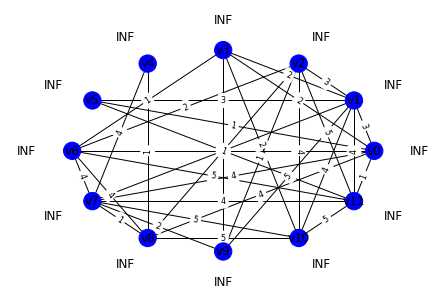

In [ ]:
pos = {}

R = 10

n = 12 # Кол-во вершин

for i in range(n):
  pos[i] = (R * np.cos(2 * i * np.pi / n), R * np.sin(2 * i * np.pi / n))
  pos[i + n] = ((R + 3) * np.cos(2 * i * np.pi / n), (R + 3) * np.sin(2 * i * np.pi / n))



labeldict = {}

for i in range(n):
  labeldict[i] = f"v{i}"
  labeldict[i + n] = "INF"

nx.draw(G, pos, labels = labeldict, node_color= ['blue' for i in range(n)] +
        ['white' for i in range(n)], with_labels=True)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos,edge_labels=labels, font_size=8)
#Строим граф

In [ ]:
#Функция для графика, можно пропустить
def draw(vertex_colors, edge_colors, used, dist, steps):
    plt.figure(dpi=150)
    labeldict = {}
    n = 12
    for i, d in enumerate(dist):
        val = d if d != 1e9 else "INF"
        labeldict[i] = f"v{i}"
        a = "d_" + "{" + str(i) + "}"
        labeldict[i + n] = '$%s$' %a + " = " + str(val)
    #nx.draw_networkx_nodes(G, pos, edgecolors = 'black')
    nx.draw_networkx(G, pos, edge_color = edge_colors,
                     node_color = vertex_colors +  ['white' for i in range(n)],
                     labels = labeldict, with_labels=True, font_size=8)
    labels = nx.get_edge_attributes(G, 'weight')    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.show()

    fig, ax =plt.subplots(1,1)
    data=[[x if x != 1e9 else "INF" for x in dist], used]
    row_labels = ["dist", "used"]
    column_labels = [f"v{i}" for i in range(n)]
    ax.axis('tight')
    ax.axis('off')
    table = plt.table(cellText=data, rowLabels=row_labels,
                      colLabels=column_labels,loc="center",
                     colColours = vertex_colors,
                      cellColours = [vertex_colors for i in data])
    table.scale(2, 2)
    plt.show()
    

In [ ]:
#Для графика
for x, y in G.edges():
    G[x][y]['color'] = 'black'

INF = "INF"

Среди ожидающих обработки, вершина v0 с минимальным расстоянием dist[v0] = 0


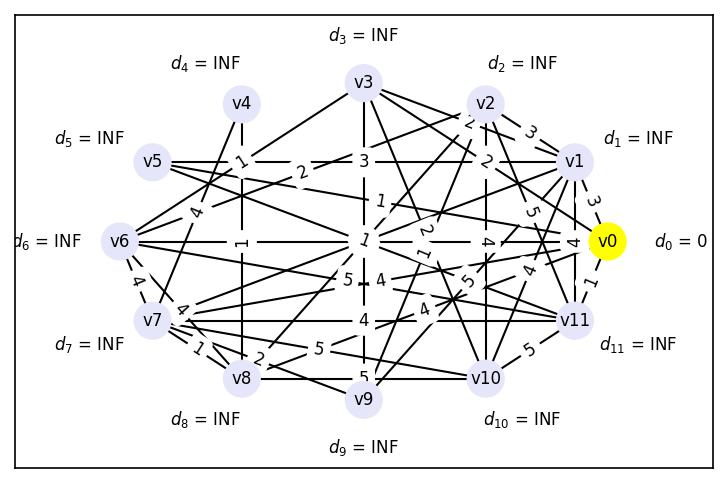

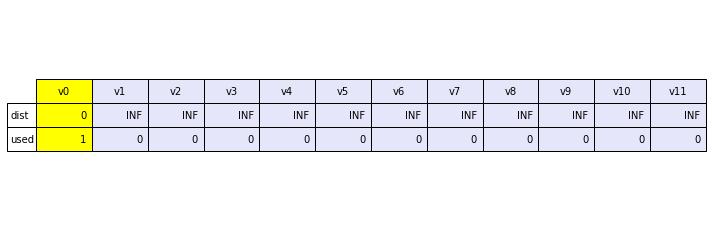

Попытаемся улучшить расстояние до соседних вершин
dist[v1] уменьшилось с INF до  3
dist[v3] уменьшилось с INF до  2
dist[v5] уменьшилось с INF до  1
dist[v6] уменьшилось с INF до  5
dist[v7] уменьшилось с INF до  4
dist[v8] уменьшилось с INF до  4
dist[v11] уменьшилось с INF до  1


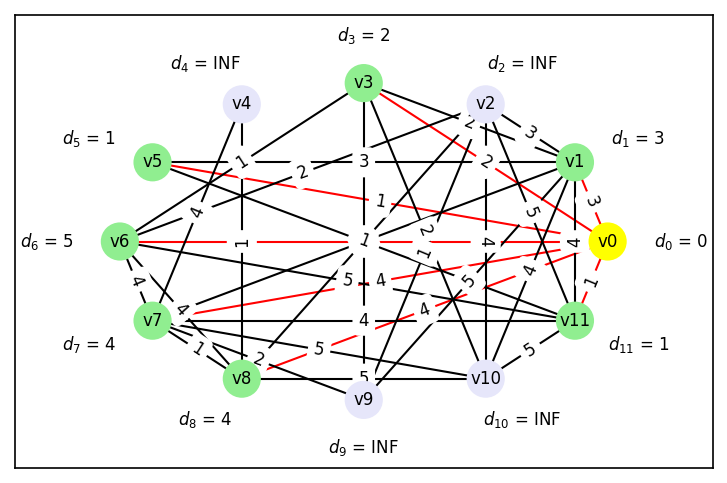

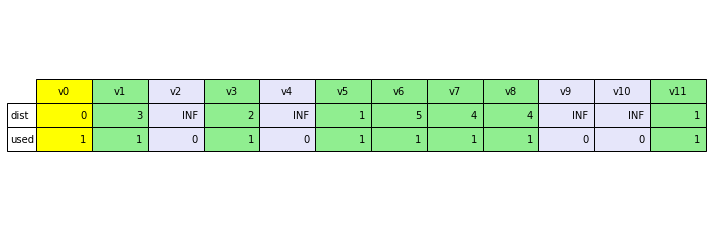

Вершина 0 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v5 с минимальным расстоянием dist[v5] = 1


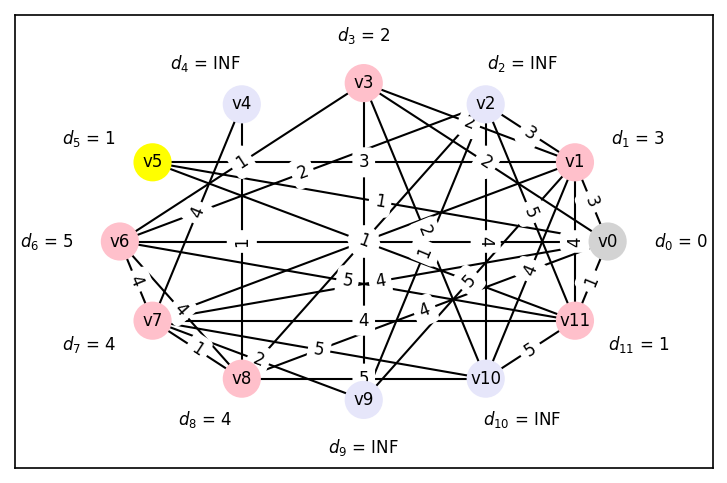

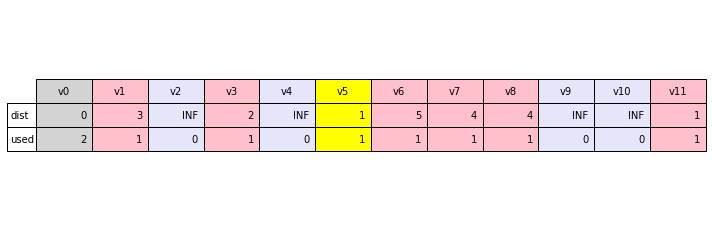

Попытаемся улучшить расстояние до соседних вершин


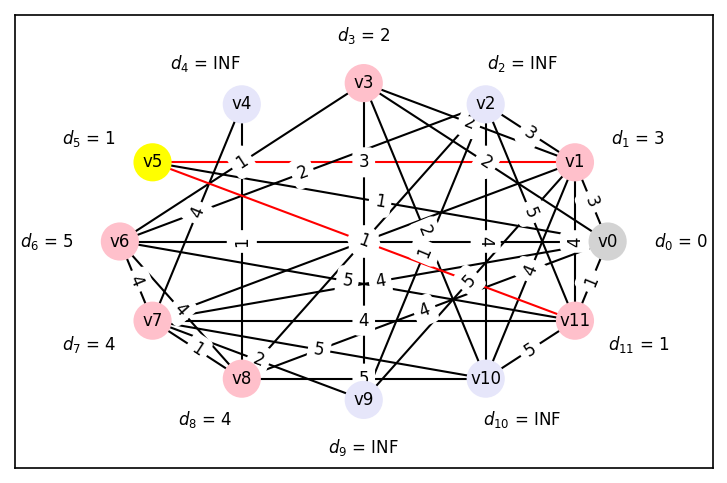

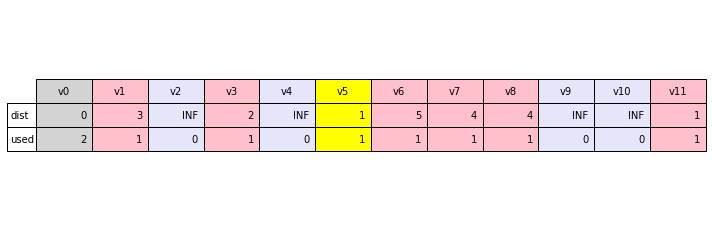

Вершина 5 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v11 с минимальным расстоянием dist[v11] = 1


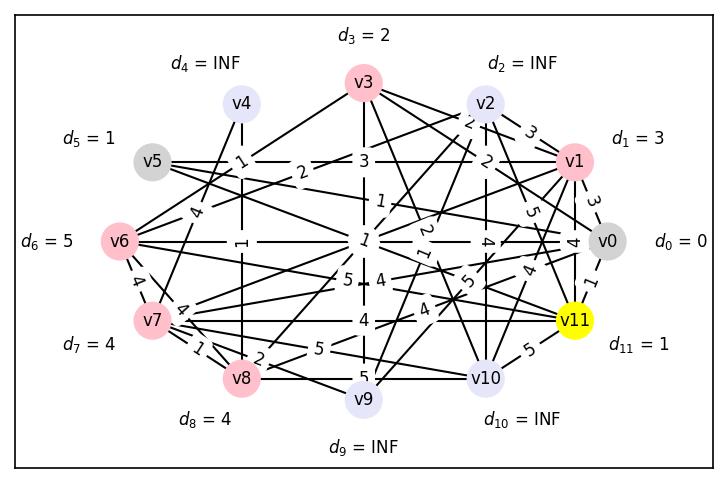

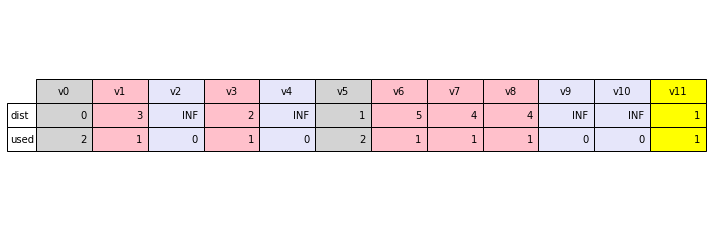

Попытаемся улучшить расстояние до соседних вершин
dist[v2] уменьшилось с INF до  6
dist[v10] уменьшилось с INF до  6


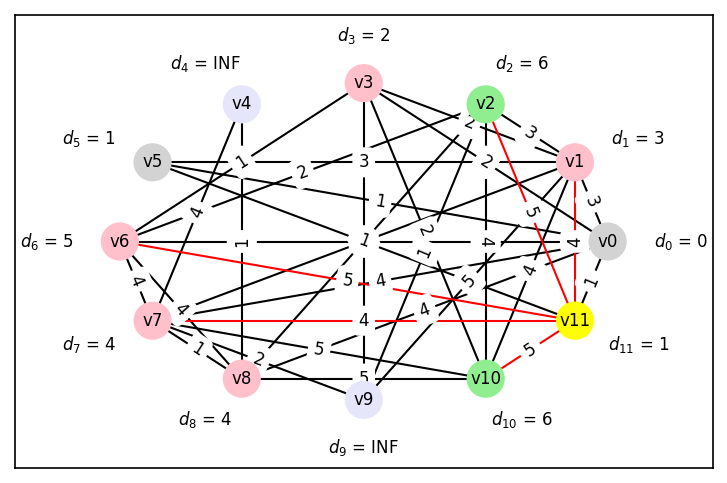

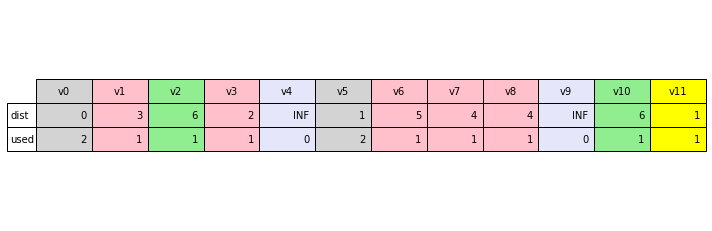

Вершина 11 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v3 с минимальным расстоянием dist[v3] = 2


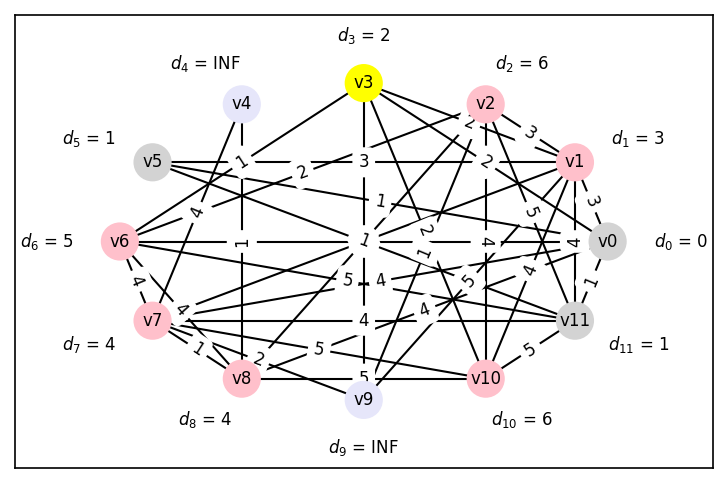

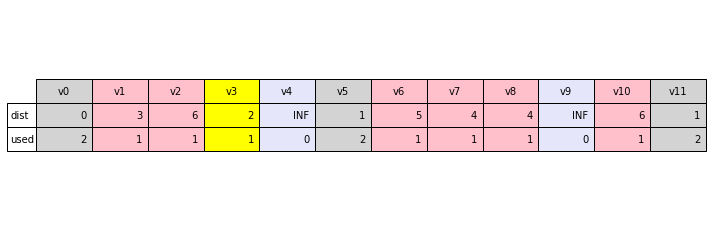

Попытаемся улучшить расстояние до соседних вершин
dist[v6] уменьшилось с 5 до  3
dist[v9] уменьшилось с INF до  3
dist[v10] уменьшилось с 6 до  4


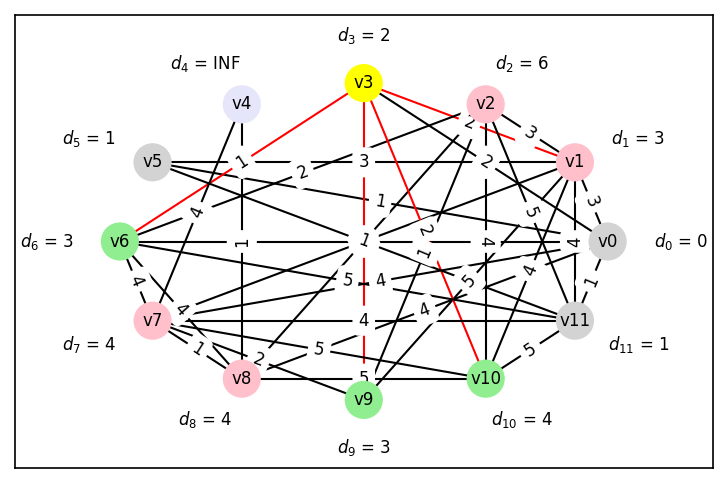

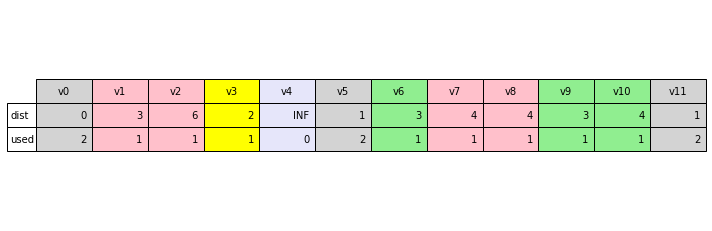

Вершина 3 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v1 с минимальным расстоянием dist[v1] = 3


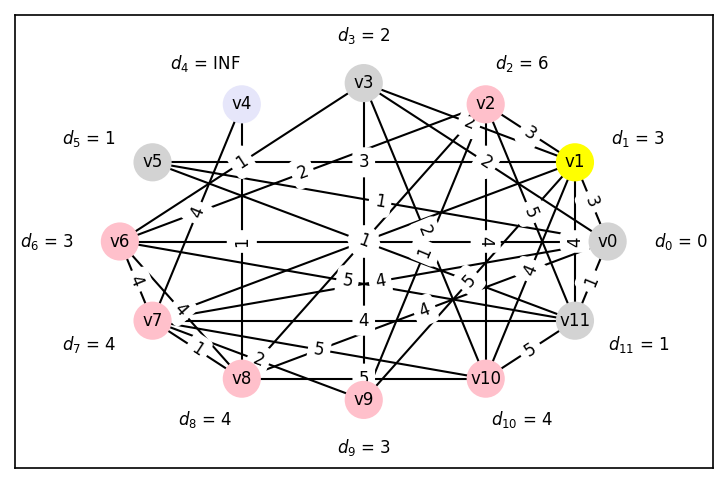

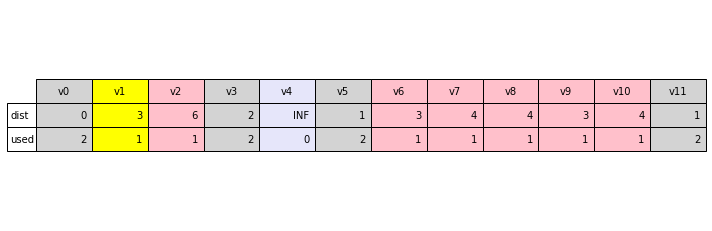

Попытаемся улучшить расстояние до соседних вершин


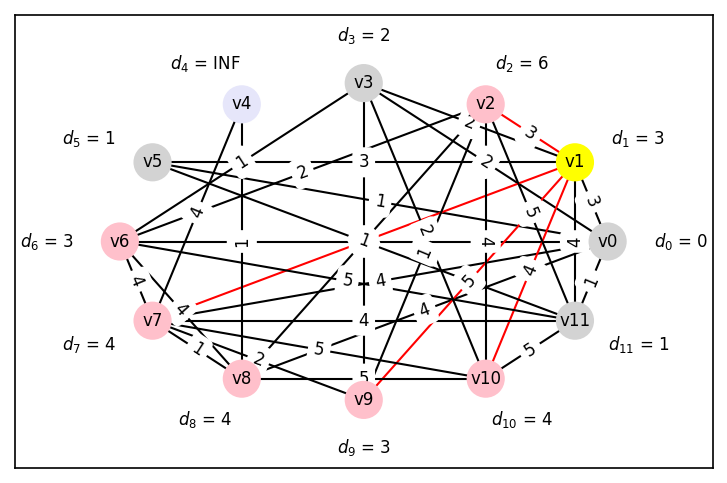

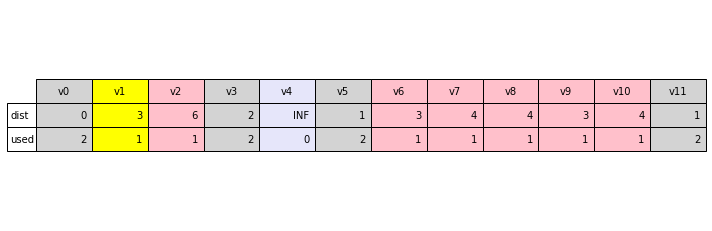

Вершина 1 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v6 с минимальным расстоянием dist[v6] = 3


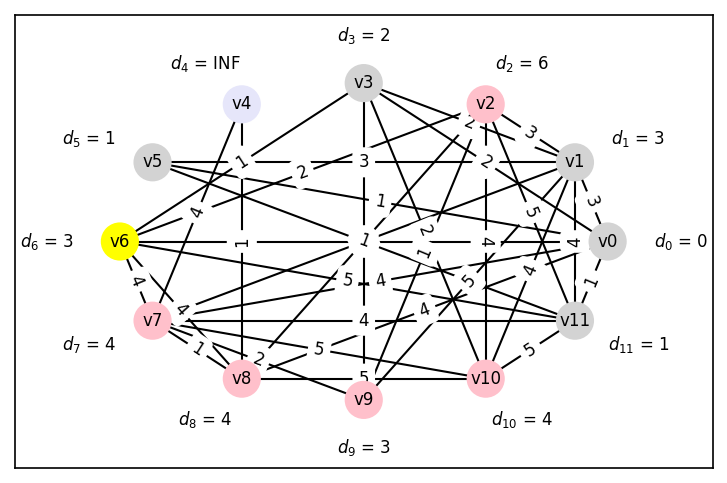

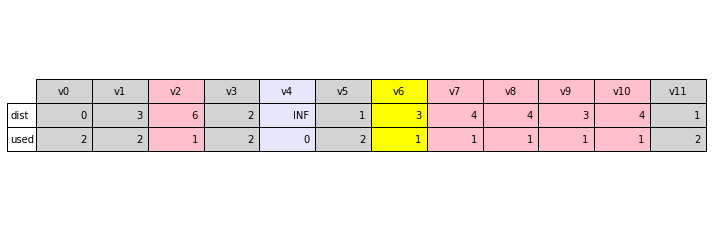

Попытаемся улучшить расстояние до соседних вершин
dist[v2] уменьшилось с 6 до  5


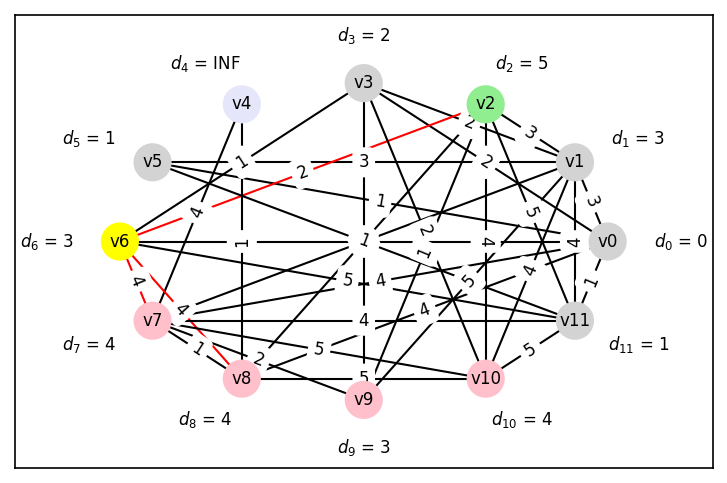

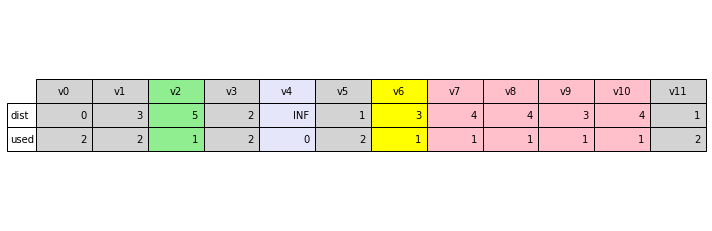

Вершина 6 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v9 с минимальным расстоянием dist[v9] = 3


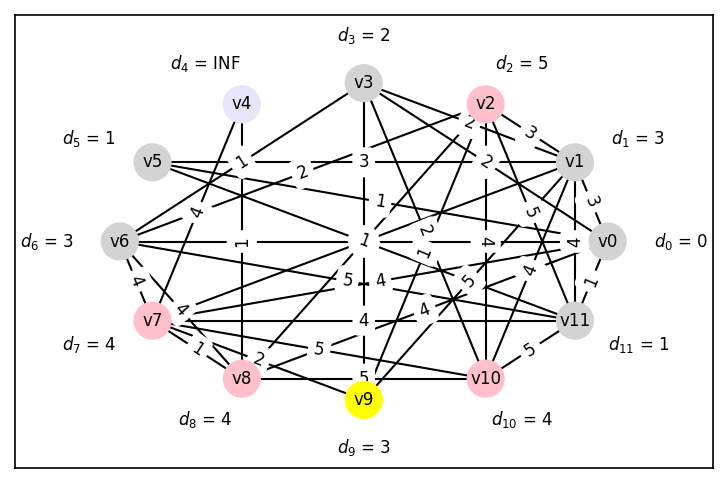

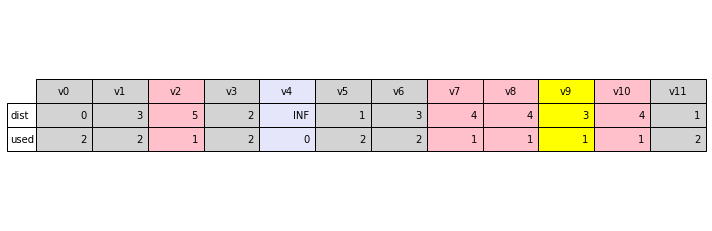

Попытаемся улучшить расстояние до соседних вершин
dist[v2] уменьшилось с 5 до  4


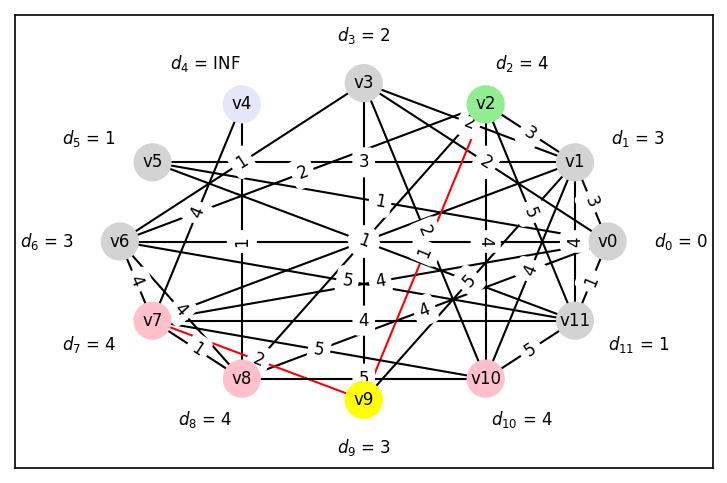

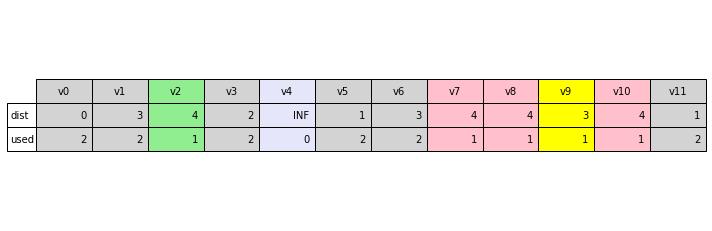

Вершина 9 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v2 с минимальным расстоянием dist[v2] = 4


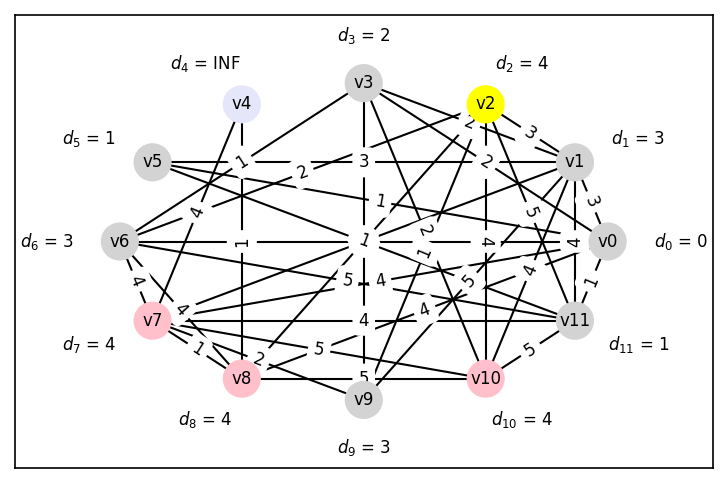

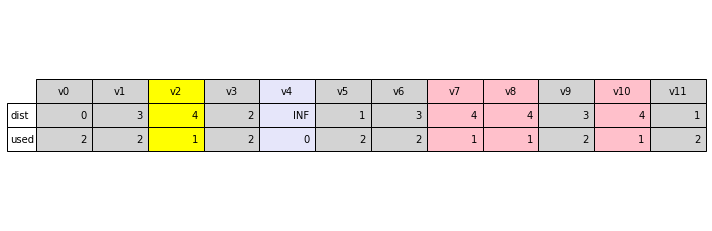

Попытаемся улучшить расстояние до соседних вершин


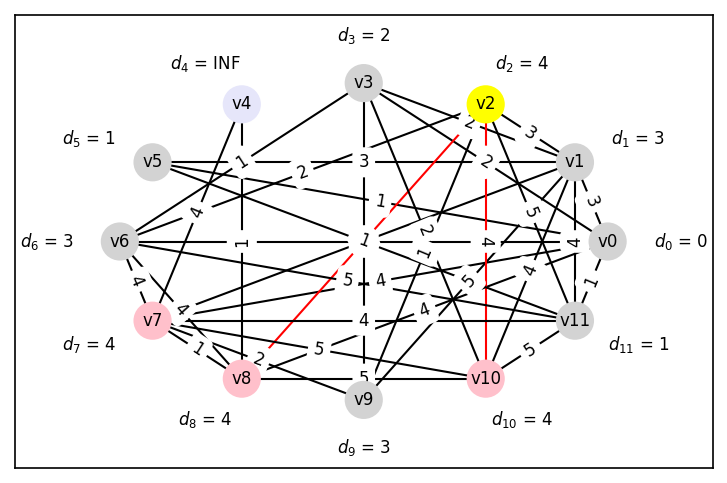

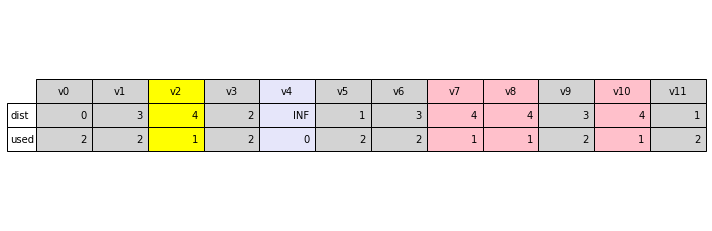

Вершина 2 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v7 с минимальным расстоянием dist[v7] = 4


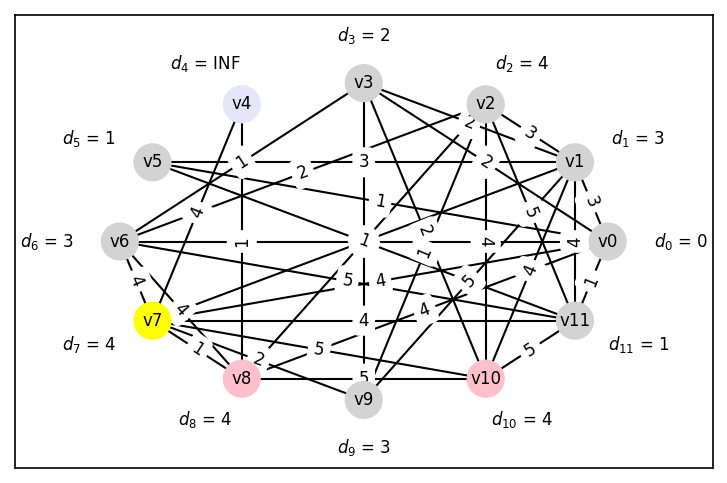

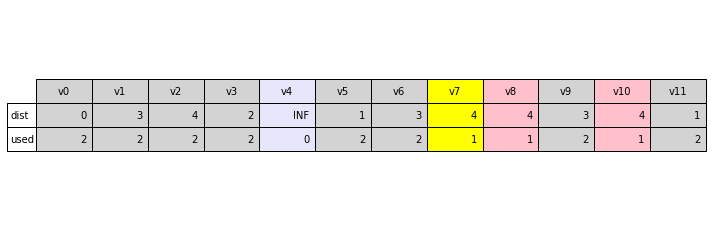

Попытаемся улучшить расстояние до соседних вершин
dist[v4] уменьшилось с INF до  8


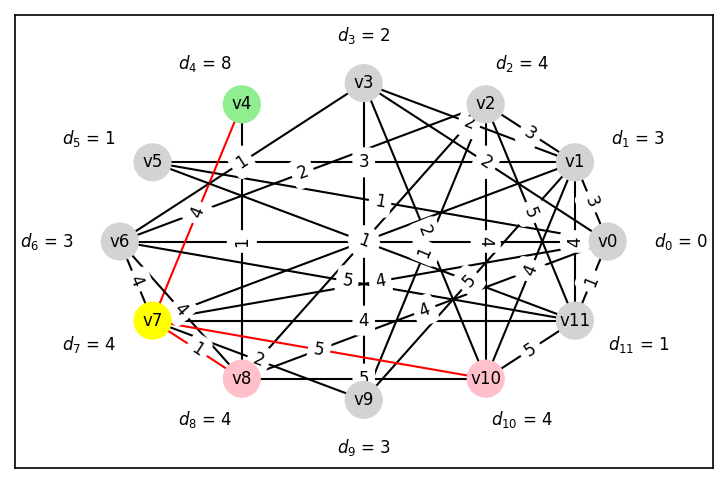

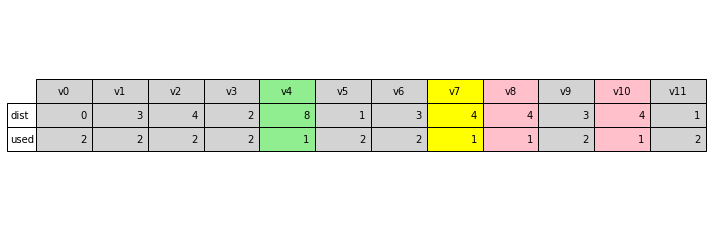

Вершина 7 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v8 с минимальным расстоянием dist[v8] = 4


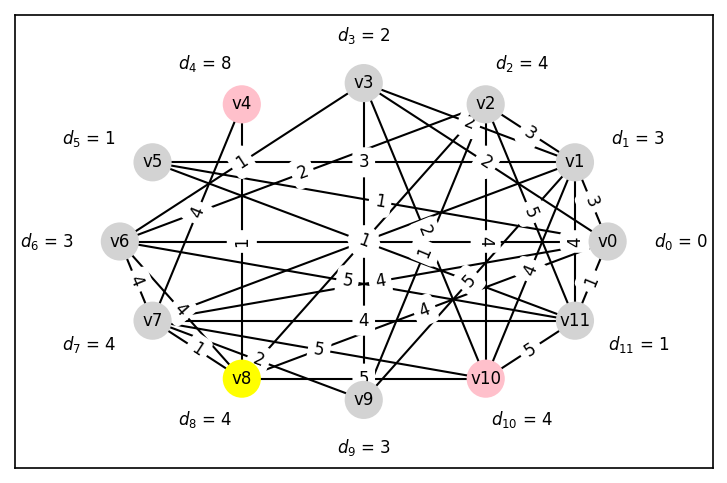

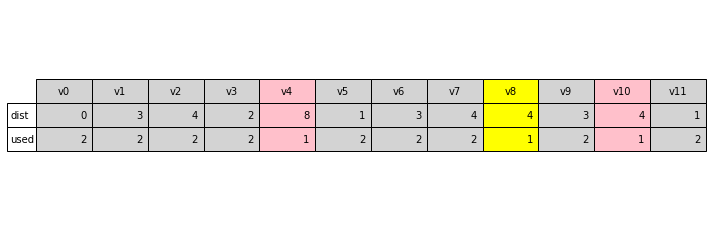

Попытаемся улучшить расстояние до соседних вершин
dist[v4] уменьшилось с 8 до  5


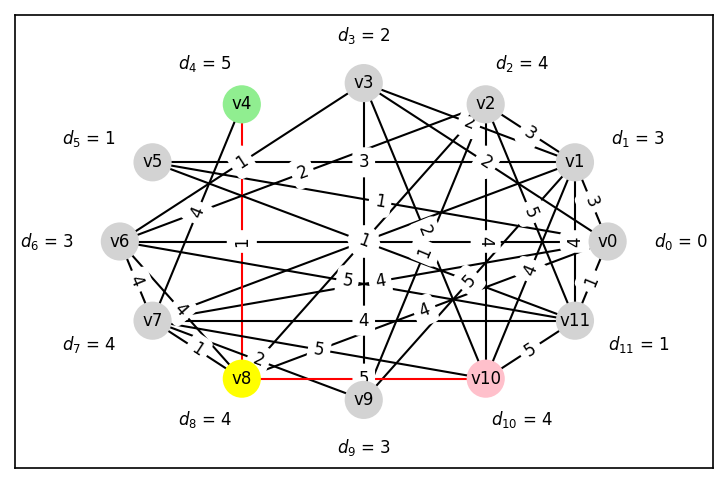

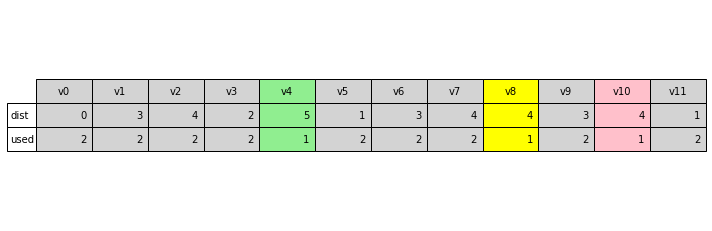

Вершина 8 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v10 с минимальным расстоянием dist[v10] = 4


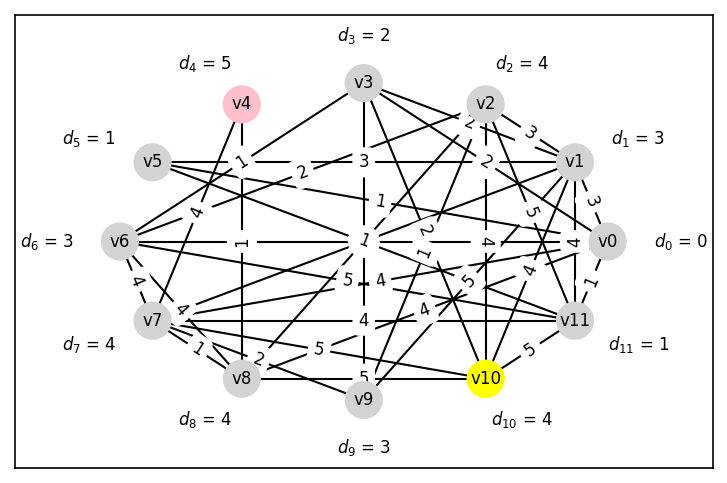

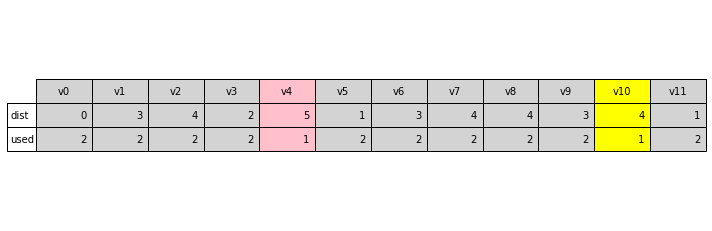

Попытаемся улучшить расстояние до соседних вершин


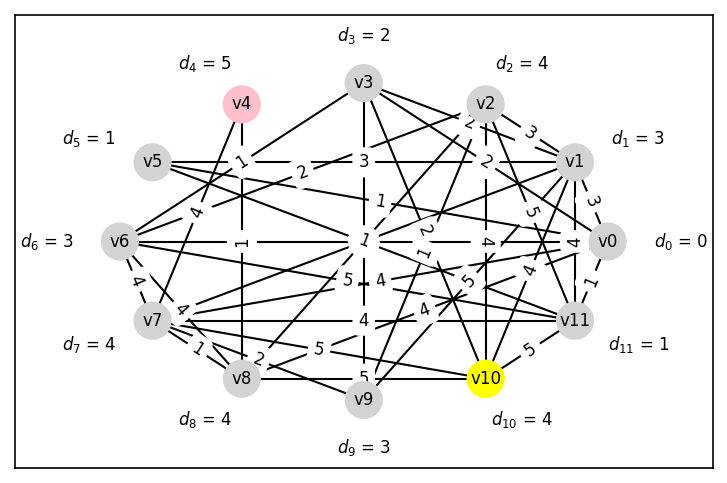

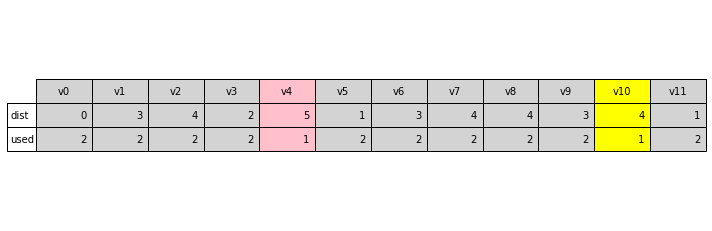

Вершина 10 обработана и можно переходить к поиску следующей вершины
Среди ожидающих обработки, вершина v4 с минимальным расстоянием dist[v4] = 5


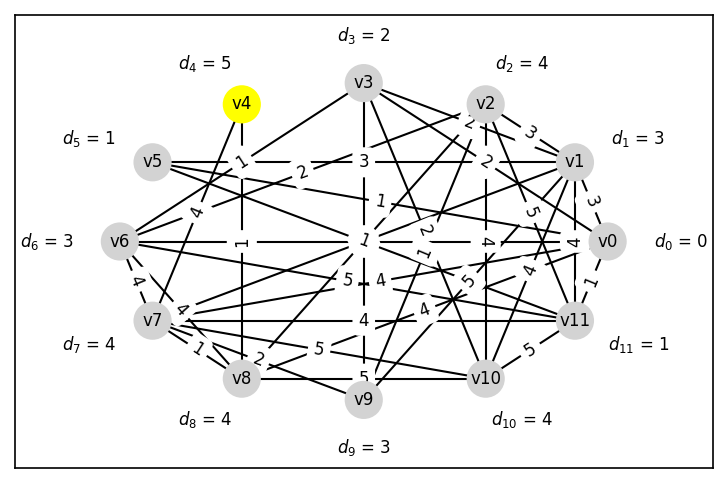

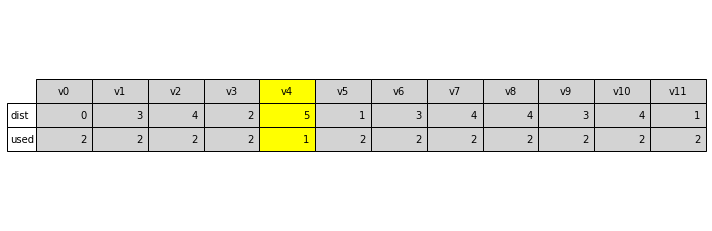

Попытаемся улучшить расстояние до соседних вершин


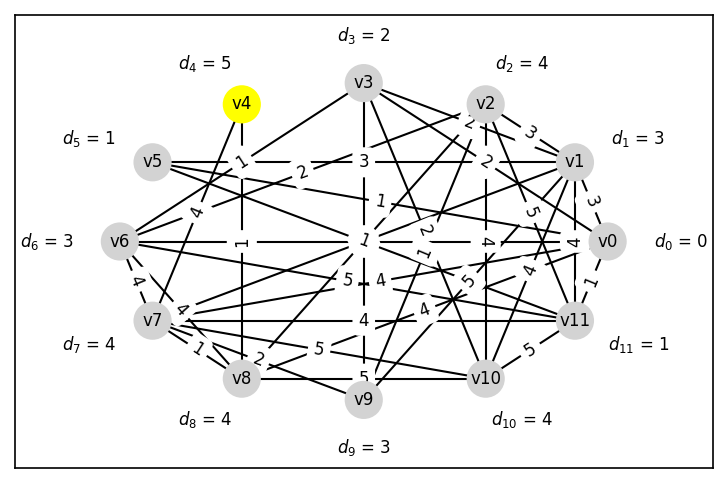

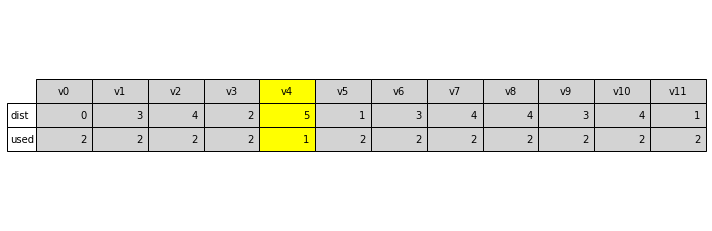

Вершина 4 обработана и можно переходить к поиску следующей вершины
Все вершины обработаны


In [ ]:
#Здесь начинается решение

# Кол-во вершин
n = 12

#Массив пометок, (0 - непосещенная вершина, 1 - ожидающая обработки,
# 2 - обработанная)
 # Непосещенная вершина - белый цвет, ожидающая - розовый, обработанная - серый
used = [0 for i in range(n)]


#Массив расстояний, изначально заполнен большими значениями(бесконечностью)
dist = [int(1e9) for i in range(n)]

s = 0 # Выбираем стартовую вершину

dist[s] = 0 # Инициальзируем расстояние от стартовой вершины до самой себя
used[s] = 1 # Теперь вершина ожидает обработки

steps = 0 #Для графика

for i in range(n):
    v = -1
    #Ищем еще не обработанную вершину с минимальным расстоянием
    for j in range(n):
        if used[j] == 1 and (v == -1 or dist[j] < dist[v]):
            v = j
    
    if v == -1:
        #К этому моменту, все достижимые из S вершины будут обработаны
        break
    
    print(f"Среди ожидающих обработки, вершина v{v} с минимальным расстоянием "
    f"dist[v{v}] = {dist[v]}")
    #Текущая вершина отмеченна желтым цветом
    
    #Код для графика
    #################################################################
    colors = ['#e6e6fa', 'pink', '#d3d3d3']
    color_map = [colors[x] for x in used]
    color_map[v] = 'yellow'
    edge_colors = [G[x][y]['color'] for x,y in G.edges()]
    draw(color_map, edge_colors, used, dist, steps)
    steps += 2
    #################################################################
    print("Попытаемся улучшить расстояние до соседних вершин")
    for u in G[v]:
        #Не смотрим уже посещенные вершины (без метки), так как кратчайшее
        #расстояние уже найдено
        if used[u] == 2:
            continue
            
        #Код для графика
        G[v][u]['color'] = 'red'  
        
        # Релаксируем очередно ребро
        if dist[v] + G[v][u]['weight'] < dist[u]:
            print(f"dist[v{u}] уменьшилось с {dist[u] if dist[u] != 1e9 else INF}"
            f" до  {dist[v] + G[v][u]['weight']}")
            dist[u] = dist[v] + G[v][u]['weight']
            used[u] = 1
            
            #Вершина меняет цвет на зеленый, показывая, что расстояние уменьшилось
            color_map[u] = '#90ee90'
        
      #Код для графика
    edge_colors = [G[x][y]['color'] for x,y in G.edges()]
    draw(color_map, edge_colors, used, dist, steps)
    for u in G[v]:
      G[v][u]['color'] = 'black'
    steps += 2

    #После обработки вершина переходит в множество посещенных (снимается метка)
    used[v] = 2
    print(f"Вершина {v} обработана и можно переходить к поиску следующей вершины")
print("Все вершины обработаны")

In [ ]:
print(f"Расстояние от вершины {s} до всех остальных: " + str(dist))

Расстояние от вершины 0 до всех остальных: [0, 3, 4, 2, 5, 1, 3, 4, 4, 3, 4, 1]


In [ ]:
steps //= 2
print(f"{steps} шагов")

24 шагов
